In [20]:
from reader import Reader
import yaml
from const import Const
import random
import numpy as np
from utils import get_F_example
from clustering import Clusters
import pandas as pd

In [2]:
reader = Reader()

In [3]:
df = reader.read('input.xlsx')

i
X
X


In [4]:
const = Const()

C:\Users\Jack\PycharmProjects\Clusters\const.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.config = yaml.load(open("settings.yaml", 'r'))


In [5]:
const.norm(df)

In [6]:
const.calculate_a(df)

In [7]:
const.config

{'conturs': {'min_points': 30,
  'contour_points': 50,
  'min_diff': 0.52,
  'num_of_lenghts': 4},
 'isolated_cluster': {'constU1': 0.05,
  'min_len': 1.52,
  'min_dif': 0.52,
  'divider': 2,
  'max_div_num': 8},
 'knots': {'min_fuses_num': 15, 'stop_const': 1.52},
 'consts': {'round_const': 2,
  'const': 0.25,
  'percent_X': 20,
  'down_steps': 4,
  'up_steps': 6,
  'power_koef': 1.16,
  'percent_Y': 33,
  'threshold': 0.8,
  'Y_step': 2.5,
  'a': 1.5170191296298825}}

In [8]:
X = df.iloc[:].values
F = np.array(get_F_example(X, const.config['consts']['a']))[:,-1]
df['F'] = F
df

,id,X1,X2,F
0,1,25.525098,13.422550,1.834846
1,2,26.243550,14.716993,2.118108
2,3,24.977152,15.894720,2.572047
3,4,25.418696,15.946192,2.712513
4,5,26.140631,17.181028,2.988368
...,...,...,...,...
201,202,54.893922,0.130927,4.422308
202,203,56.727169,1.764082,4.039618
203,204,55.864933,2.653560,4.064315
204,205,55.310172,-0.095715,4.233485


Researching dataset

In [16]:
import matplotlib.pyplot as plt

[]

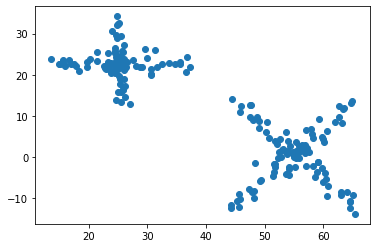

In [17]:
plt.scatter(df['X1'], df['X2'])

In [23]:
df_c1 = pd.DataFrame(out_clusters[0])
df_c2 = pd.DataFrame(out_clusters[1])

In [24]:
df_c1

,0,1,2,3
0,113.0,25.084765,22.571915,5.610967
1,83.0,25.075888,22.998288,5.596379
2,186.0,25.016267,23.133681,5.579302
3,132.0,24.814246,22.330911,5.574213
4,28.0,24.698549,22.044134,5.508175
...,...,...,...,...
95,40.0,36.536289,20.724773,1.497587
96,142.0,37.328156,21.785953,1.470934
97,143.0,36.686961,24.409896,1.423818
98,121.0,13.479015,23.881697,1.379278


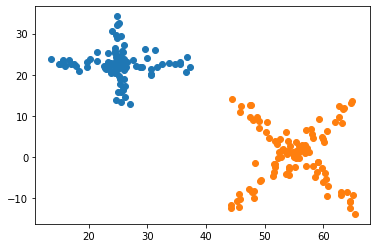

In [27]:
plt.scatter(df_c1[1], df_c1[2])
plt.scatter(df_c2[1], df_c2[2])

In [9]:
cluster = Clusters(const.config)

In [10]:
out_clusters = cluster.get_isolated_clusters(df)

In [11]:
len(out_clusters)

2

In [12]:
out_clusters

[[array([113.        ,  25.08476529,  22.57191544,   5.61096712]),
  array([83.        , 25.07588776, 22.99828812,  5.59637908]),
  array([186.        ,  25.01626656,  23.13368104,   5.57930215]),
  array([132.        ,  24.8142456 ,  22.33091131,   5.57421331]),
  array([28.        , 24.69854921, 22.04413375,  5.50817522]),
  array([130.        ,  24.69406277,  23.28200405,   5.48947566]),
  array([29.        , 24.59929005, 21.86262531,  5.44031305]),
  array([134.        ,  25.72500973,  23.50270995,   5.43582561]),
  array([88.        , 25.12548751, 23.6545407 ,  5.4206605 ]),
  array([85.        , 25.59903735, 23.72268685,  5.41617378]),
  array([189.        ,  25.69457735,  23.69230933,   5.40503733]),
  array([91.        , 24.14978636, 22.64974432,  5.38241834]),
  array([30.        , 25.55737451, 21.87867425,  5.33235067]),
  array([111.        ,  25.64499077,  21.85657462,   5.27241359]),
  array([191.        ,  24.4958778 ,  21.47719525,   5.22423794]),
  array([131.        , 

In [13]:
def save_array(data, header, fmt, filename, delimiter=','):
    if filename.endswith('csv') or filename.endswith('txt'):
        np.savetxt(filename, data, fmt=fmt, header=header)

In [14]:
result = []
for i in range(len(out_clusters)):
    for point in out_clusters[i]:
        result.append(np.append(point, i))

header = str(['Id'] + ['X{}'.format(i+1) for i in range(len(result[0])-3)] + ['F'] + ['Cluster_id'])[1:-1]
fmt = str(['%i'] + ['%1.6f' for c in result[0][2:-1]] + ['%1.6f', '%i'])[1:-1].replace("'", '')
out_file = 'output.csv'
save_array(result, header, fmt, out_file)

In [15]:
result

[array([113.        ,  25.08476529,  22.57191544,   5.61096712,
          0.        ]),
 array([83.        , 25.07588776, 22.99828812,  5.59637908,  0.        ]),
 array([186.        ,  25.01626656,  23.13368104,   5.57930215,
          0.        ]),
 array([132.        ,  24.8142456 ,  22.33091131,   5.57421331,
          0.        ]),
 array([28.        , 24.69854921, 22.04413375,  5.50817522,  0.        ]),
 array([130.        ,  24.69406277,  23.28200405,   5.48947566,
          0.        ]),
 array([29.        , 24.59929005, 21.86262531,  5.44031305,  0.        ]),
 array([134.        ,  25.72500973,  23.50270995,   5.43582561,
          0.        ]),
 array([88.        , 25.12548751, 23.6545407 ,  5.4206605 ,  0.        ]),
 array([85.        , 25.59903735, 23.72268685,  5.41617378,  0.        ]),
 array([189.        ,  25.69457735,  23.69230933,   5.40503733,
          0.        ]),
 array([91.        , 24.14978636, 22.64974432,  5.38241834,  0.        ]),
 array([30.        , 2